In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [4]:
data=sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
Standard_Scaler=StandardScaler()
data[['total_bill','tip']]=Standard_Scaler.fit_transform(data[['total_bill','tip']])
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4


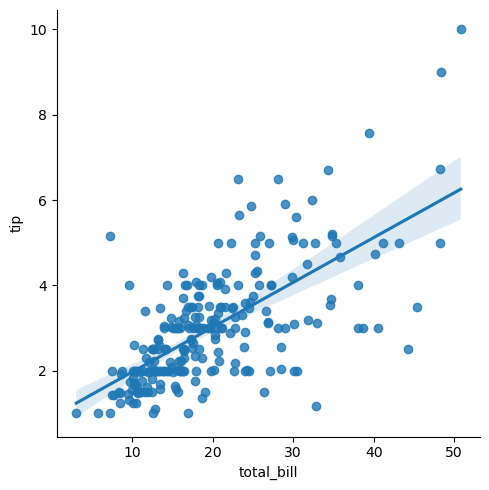

In [5]:
sns.lmplot(x='total_bill',y='tip',data=data)

In [9]:
X=data[['total_bill','size','day']]
y=data['tip']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
num_features=['total_bill','size']
cat_features=['day']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)
pipeline=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('model',LinearRegression())
    ]
)

In [10]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_bill', 'size']),
                                                 ('cat', OneHotEncoder(),
                                                  ['day'])])),
                ('model', LinearRegression())])

In [11]:
y_pred = pipeline.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.3490871546083461
R^2 Score: 0.4675297613048528


Logistic Regression

In [19]:
X=data[['total_bill','size','day']]
y=data['tip']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
num_features=['total_bill','size']
cat_features=['day']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)
pipeline=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('model',LinearRegression())
    ]
)

In [20]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_bill', 'size']),
                                                 ('cat', OneHotEncoder(),
                                                  ['day'])])),
                ('model', LinearRegression())])

In [22]:
y_pred = pipeline.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))   

Mean Squared Error: 0.3490871546083461
R^2 Score: 0.4675297613048528


How to improve model performance?

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error


In [25]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Linear Regression

In [29]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
df=sns.load_dataset('diamonds')
X=df.drop(columns=['price'])
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
num_features=['carat','depth','table','x','y','z']
cat_features=['cut','color','clarity']
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_features),
        ('cat',OneHotEncoder(),cat_features)
    ]
)
pipeline=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('model',LinearRegression())
    ]
)    
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))   
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error: 1288705.4778516744
R^2 Score: 0.9189331350419387
Mean Absolute Error: 737.1513665933275
Mean Absolute Percentage Error: 0.3952933516494325
CPU times: total: 312 ms
Wall time: 282 ms


Decission Tree

In [31]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
df=sns.load_dataset('diamonds')
X=df.drop(columns=['price'])
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
num_features=['carat','depth','table','x','y','z']
cat_features=['cut','color','clarity']
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_features),
        ('cat',OneHotEncoder(),cat_features)
    ]
)
pipeline=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('model',DecisionTreeRegressor())
    ]
)    
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))   
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error: 543683.156470152
R^2 Score: 0.9657992537604383
Mean Absolute Error: 356.9291805710048
Mean Absolute Percentage Error: 0.0854211262925368
CPU times: total: 766 ms
Wall time: 1.16 s


Random Forest Algorithm

In [ ]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
df=sns.load_dataset('diamonds')
X=df.drop(columns=['price'])
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
num_features=['carat','depth','table','x','y','z']
cat_features=['cut','color','clarity']
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_features),
        ('cat',OneHotEncoder(),cat_features)
    ]
)
pipeline=Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('model',RandomForestClassifier())
    ]
)    
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))   
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))